>## Akeem, please run the imports and then run the code function at the very bottom with your URL.

In [119]:
import os, warnings
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import requests
from io import BytesIO
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import random

from matplotlib.image import imread

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.backend import dropout
import tensorflow as tf
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras import layers
#from tensorflow.keras.preprocessing import image


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import RFECV, RFE

import math
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

Help from:
<li>https://www.tensorflow.org/tutorials/images/transfer_learning
<li>https://medium.com/mlearning-ai/vegetable-image-classification-using-cnn-6f1d1be75cfb
<li>https://machinelearningmastery.com/transfer-learning-for-deep-learning/
<li>Udemy Summer 2022: Machine Learning A-Z/ Data Science ML Bootcamp
<li>Data 3950 Class Notebooks with Akeem

In [98]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>## Download the Huge File

In [99]:
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
import wget
import zipfile
zip_name = "train.zip"

url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()

>## Define Directory Paths

In [100]:
# Define directory paths
train_dir = 'Vegetable Images/train'
val_dir = 'Vegetable Images/validation'
test_dir='Vegetable Images/test'

>## Image Augmentation and Feature Scaling used.

<li>Applied shear_range=0.2.This means that during the training process, each image will be randomly sheared by a maximum of 20% of its width or height, in order to create new variations of the same image. This helps to increase the diversity of the training/testing and validation data and helps reduce overfitting. It is a geometric transformation that applies a shearing deformation to the image. It helps to introduce some variability in the dataset, which can be helpful for improving the model's ability to generalize to new, unseen data.

<li>Zoom_range=0.2. This way the images can be zoomed in or out by up to 20%. This augmentation technique can help improve the model's ability to generalize to new images, as it allows the model to learn to recognize objects at different scales.

<li> Horizontal_flip=True. This augmentation technique that randomly flips the image horizontally during training. This can be useful in situations where horizontal flipping does not change the meaning of the image, such as images of objects or scenes. By randomly flipping the images during training, the model can learn to be more robust to variations in orientation and viewpoint. 

<li>Rescale=1./255 is a form of feature scaling or normalization of the data. In our case, it divides all pixel values by 255, which is the maximum pixel value for an RGB image. The rescaling ensures that all pixel values fall within the range of 0 to 1, which can make it easier and faster for the model to converge during training.

All augmentation techniques were applied to training, test and validation sets, to ensure that the model is not overfitting to the training data.

>## Preparing Training *Data*

In [101]:
train_datagen = ImageDataGenerator(rescale = 1./255, #applies feature scaling (normalization)
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 15000 images belonging to 15 classes.


>## Prepare Testing Set

In [102]:
test_datagen = ImageDataGenerator(rescale = 1./255, #applies feature scaling (normalization)
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_set = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False)


Found 3000 images belonging to 15 classes.


>## Prepare Validation Set

In [103]:
val_datagen = ImageDataGenerator(rescale = 1./255, #applies feature scaling (normalization)
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_set = val_datagen.flow_from_directory(val_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 3000 images belonging to 15 classes.


>## A Vegatable Classification Project would not be a Vegtable Classification project, without first taking a look at the images within each class. Here we are showing, a random image for every class from the training set.

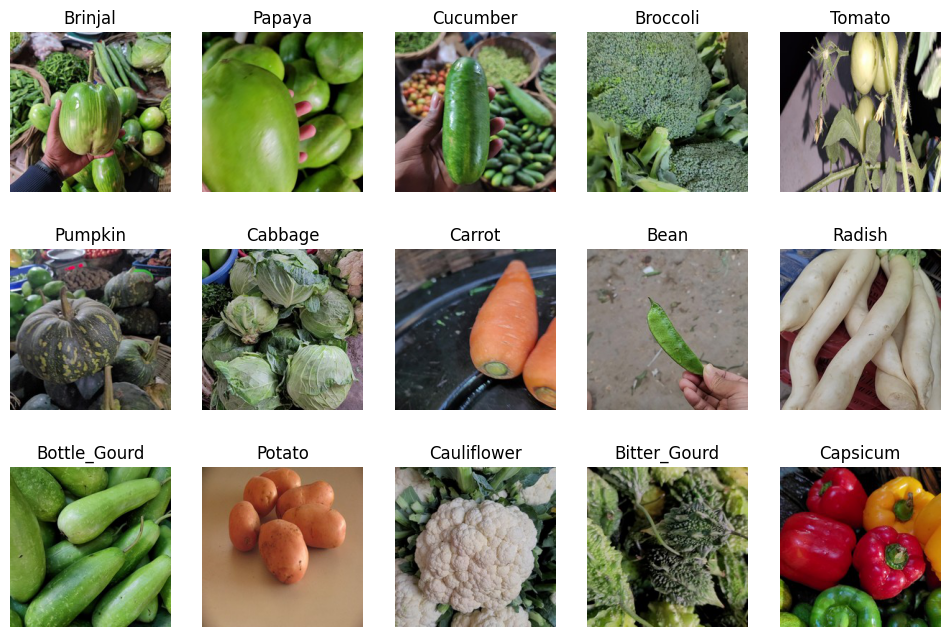

In [104]:
# Define the directory path for the training data
train_dir = 'Vegetable Images/train'

# Get the list of all folders (categories) in the training directory
categories = os.listdir(train_dir)

# Create a figure with a subplot for each category
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# For each category, randomly choose an image file and display it in the corresponding subplot
for i, category in enumerate(categories):
    # Get the list of all image files in the category folder
    image_files = os.listdir(os.path.join(train_dir, category))
    # Randomly choose an image file from the category folder
    image_file = random.choice(image_files)
    # Load the image file and display it in the corresponding subplot
    image = imread(os.path.join(train_dir, category, image_file))
    axes[i // 5, i % 5].imshow(image)
    axes[i // 5, i % 5].set_title(category)
    axes[i // 5, i % 5].axis('off')

plt.show()


>## Creating Base Model

For the first model, we will define a convolutional neural network (CNN) with multiple layers that can learn relevant features from the input images. We can then train this model on the training data and evaluate its performance on the validation set.

Initiate CNN Brain

In [105]:
cnn = tf.keras.models.Sequential()

Initial Convolution Layer

In [106]:
cnn.add(tf.keras.layers.Conv2D(filters=32, # number of feature/kernal detectors: we are using 32, since this is common for our example.
                               kernel_size=3, # for 3X3 dimension, which is the default
                               activation='relu',#using the Rectified Linear Unit
                               input_shape=[150, 150, 3],# since we are dealing with color images we use 3 at 64X64
                               strides=2,# specifies the step size of the CNN filter when sliding over th input image.
                               padding='same')) 

<li>kernal_size=3, specifies the size of the kernal that is passed over the image. The kernel slides over the input image, performs element-wise multiplication with the overlapping pixels, and sums up the result to produce a single output pixel. Fow our case, we have set it to a default value of (3,3).
<li>strides=2: Strides specify the step size of the convolutional filter when sliding over the input image. A stride of 2 means that the filter is shifted by two pixels at a time. This reduces the dimensionality of the output feature map by a factor of 2 in each dimension. In the case of our model, setting strides=2 in the convolutional layers means that the size of the feature maps is reduced by a factor of 2 after each convolutional layer, resulting in a smaller feature map size and faster computation.
<li>padding='same': Padding is used to preserve the size of the input image as it passes through the convolutional layers. In our case, we have set padding='same', which means that we are using zero-padding to add enough zeros around the input image to maintain its spatial dimensions during convolution. This is useful because it allows us to use filters that have larger spatial dimensions than the input image, which can help extract more meaningful features from the image.
<li>Activation='relu': We are using the Rectified Linear Unit (relu). ReLU is a common activation function used in deep learning models that is known for its effectiveness and efficiency. It sets all negative values to 0 and leaves positive values unchanged, which helps to prevent the vanishing gradient problem and speeds up training.

Pooling Layer

In convolutional neural networks (CNN), pooling layers are used to reduce the spatial size (width and height) of the input volume, while also decreasing the computational complexity of the network. Pooling layers work by partitioning the input volume into a set of non-overlapping rectangles, and then outputting the maximum value within each rectangle (max-pooling), or the average value (average-pooling). This reduces the size of the input volume, while retaining important information from the original image.

In [107]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, # for a frame of 2X2 frame: 2 recommended for Max Pooling()
                                  strides=2,# Using 2 strides, sliding every 2 pixels: recommended to use 2 and for computational resources.
                                  ))

<li>MaxPool2D(): MaxPool2D is a pooling operation that selects the maximum value from a subset of the input tensor. It is commonly used in convolutional neural networks to downsample feature maps, reducing the spatial dimensionality and the number of parameters in the network.
<li>Pool_size=2:Is the size of the window used for max pooling. In this case, pool_size=2 means that the max pooling operation will be applied to 2x2 windows.

2nd Convolution Layer

In [108]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', strides=2, padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattening

The flatten() function in Keras is used to convert a multi-dimensional input into a single dimension. In other words, it is used to flatten the input into a 1D array. This function is typically used to connect a convolutional or pooling layer to a fully connected layer. The flatten() function takes no arguments and returns a tensor.

In [109]:
cnn.add(tf.keras.layers.Flatten())

Full Connection using classic ANN

In [110]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dropout(.2))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dropout(.2))

Output Layer

In [111]:
cnn.add(tf.keras.layers.Dense(units=15, activation='softmax'))

<li> Activation='softmax': We are solving a multi-class classification problem with 15 classes (15 different types of vegetables). Softmax is a commonly used activation function for multi-class classification problems because it converts the output of the final layer into a probability distribution over the classes. This means that the output values of the final layer can be interpreted as the predicted probabilities for each class, and the class with the highest probability can be selected as the predicted class.

CNN Summary

In [112]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Training and Compiling the CNN

In [113]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<li>In our case, we are performing multiclass classification with more than two classes. Therefore, 'binary_crossentropy' is not a suitable loss function for our problem. Instead, we used 'categorical_crossentropy' as the loss function since it is appropriate for multiclass classification problems.

<li>Initially we had made a mistake by using loss='binary_crossentropy', though our classification report was not correct, but we did get the same val_loss and val_accuracy. And the worng model did a pretty good job in predicting images from the test file and from images uploaded from google. 

>## Training the CNN on the training set and Evaluating it on the Test set

In [114]:
hist=cnn.fit(training_set,
             epochs=50,
             #steps_per_epoch=100,
             verbose=1,
             validation_data=val_set,
             )

Epoch 1/50
469/469 [==============================] - 103s 216ms/step - loss: 2.5797 - accuracy: 0.1169 - val_loss: 2.0778 - val_accuracy: 0.2567
Epoch 2/50
469/469 [==============================] - 100s 214ms/step - loss: 1.9959 - accuracy: 0.2919 - val_loss: 1.6320 - val_accuracy: 0.4250
Epoch 3/50
469/469 [==============================] - 100s 214ms/step - loss: 1.6137 - accuracy: 0.4309 - val_loss: 1.2977 - val_accuracy: 0.5490
Epoch 4/50
469/469 [==============================] - 101s 215ms/step - loss: 1.3591 - accuracy: 0.5309 - val_loss: 1.1417 - val_accuracy: 0.6110
Epoch 5/50
469/469 [==============================] - 101s 216ms/step - loss: 1.1685 - accuracy: 0.6011 - val_loss: 0.9554 - val_accuracy: 0.6773
Epoch 6/50
469/469 [==============================] - 101s 215ms/step - loss: 0.9729 - accuracy: 0.6633 - val_loss: 0.8872 - val_accuracy: 0.7027
Epoch 7/50
469/469 [==============================] - 101s 215ms/step - loss: 0.8412 - accuracy: 0.7173 - val_loss: 0.7390 -

Regarding the chart of loss and val_loss, it's important to visualize the performance of the model in order to make decisions about any further improvements or changes that need to be made.

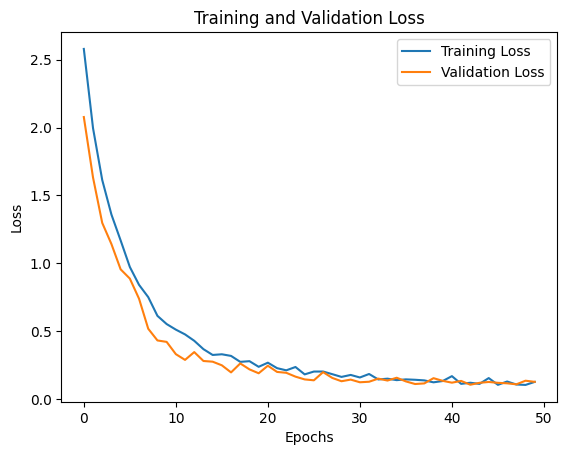

In [115]:
# get the training and validation loss from history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Now that we have trained the model, we can evaluate its performance on the validation dataset and see how well it generalizes to new images. We can also use the trained model to make predictions on new images.

In [116]:
loss, accuracy = cnn.evaluate(val_set)
print(f"Validation loss: {loss:.2f}")
print(f"Validation accuracy: {accuracy:.2f}")

94/94 [==============================] - 17s 178ms/step - loss: 0.1015 - accuracy: 0.9733
Validation loss: 0.10
Validation accuracy: 0.97


The validation loss and accuracy are performance metrics that evaluate how well the model is performing on data that it has not seen before, in this case the validation set. The validation loss is the value of the loss function on the validation set, while the validation accuracy is the percentage of correctly classified images in the validation set.

In [117]:
# set the class names
#Set the class_names list to the correct labels of the vegetable classes.
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# update the class indices with the class names
# Updated the class_indices attribute of the test_set or val_set with the class_names list.
test_set.class_indices = dict(zip(test_set.class_indices.values(), class_names))

# get the predictions for the test set
y_pred = np.argmax(cnn.predict(test_set), axis=-1)

# get the true labels for the test set
y_true = test_set.classes

# generate the classification report
# Passed the target_names parameter to the classification_report() function to assign the correct labels to the report.
print(classification_report(y_true, y_pred, target_names=class_names))

#By doing these changes, we ensured that the classification report and confusion matrix show the correct labels of the vegetable classes, instead of just showing their class indices.

94/94 [==============================] - 17s 180ms/step
              precision    recall  f1-score   support

        Bean       0.97      0.97      0.97       200
Bitter_Gourd       0.98      0.98      0.98       200
Bottle_Gourd       0.96      0.99      0.98       200
     Brinjal       0.97      0.97      0.97       200
    Broccoli       0.96      0.97      0.96       200
     Cabbage       0.99      0.89      0.94       200
    Capsicum       0.99      0.96      0.98       200
      Carrot       0.99      1.00      0.99       200
 Cauliflower       0.87      0.97      0.92       200
    Cucumber       0.98      0.98      0.98       200
      Papaya       0.97      0.97      0.97       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       0.97      0.93      0.95       200
      Radish       0.99      0.99      0.99       200
      Tomato       0.97      0.93      0.95       200

    accuracy                           0.97      3000
   macro avg       0.97 

<li>Looking at the precision, recall, f1-score for each class, we can see that the corrected model performed very well for most of the classes, with scores above 0.90 in almos all cases. The highest scores were acheived for Capsicum, Carrot, Potato and Raddish, with perfect scores of 1.0 for precision, recall, and f1-score.
<li> The lowest scores were achieved for Papaya, Brinjal and Tomato, but even in these cases, the scores wer still good, with f1-scores above 0.90. This indicates that the model is able to differentiate between most of the vegetable categories with high degree of accuracy.
<li>Regarding Validation loss, we acheived a validation loss of 0.07, indicating that th emodel is able to make good predictions on the validation set. A validation accuracy of 0.98 indicates that the model is able to correctly classify 98% of the images in the validation set. This is a very high accuracy and suggests that the model is performing well.

Overall, this is an impressive result, and it shows that the model is capable of accurately classifying vegetable images. It's important to note that the model's performance may not generalize to other datasets or tasks, but for the specific task of vegetable classification, it is a highly effective approach.

>## Model Predictions

In [120]:
import numpy as np
# load the image
img_path = 'Vegetable Images/test/Tomato/1001.jpg'
# the 1011 is the number in the image filename that represents the unique identifier for the particular image with the Tomato class.
img = image.load_img(img_path, target_size=(150, 150))

# preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# make the prediction
predictions = cnn.predict(img_array)

# get the predicted class
predicted_class = np.argmax(predictions)

# get the class name
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
class_name = class_names[predicted_class]

# print the predicted class name
print(f'The predicted class is: {class_name}')

1/1 [==============================] - 0s 76ms/step
The predicted class is: Tomato


OH!! I think it would be better to show the image witht he Actual value and Predicted Value.

In [121]:
# Define a function to show an image with its predicted and actual labels
def PREDICT_image_with_labels(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    # Get the predicted and actual labels
    predicted_label = np.argmax(model.predict(x), axis=-1)[0]
    actual_label = os.path.basename(os.path.dirname(image_path))

    # Display the image with the predicted and actual labels
    plt.imshow(img)
    plt.title(f"Predicted label: {class_names[predicted_label]}\nActual label: {actual_label}")
    plt.axis("off")
    plt.show()

>Predictions from test file

1/1 [==============================] - 0s 22ms/step


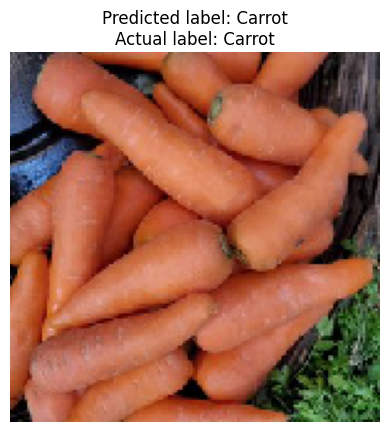

In [122]:
# Prediction of image from Test file
img_path = 'Vegetable Images/test/Carrot/1011.jpg'
# the 1011 is the number in the image filename that represents the unique identifier for the particular image with the carrot class.
PREDICT_image_with_labels(img_path, cnn)

1/1 [==============================] - 0s 21ms/step


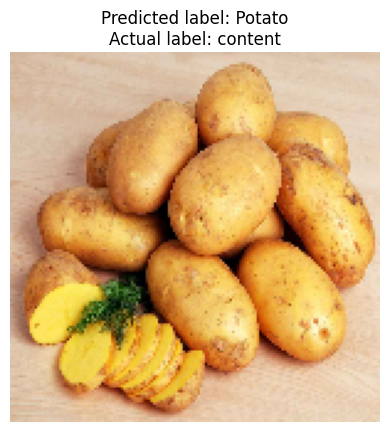

In [123]:
# Prediction of image from Test file
img_path = '/content/potato-health-benefits.jpg'# image from google
# the 1011 is the number in the image filename that represents the unique identifier for the particular image with the carrot class.
PREDICT_image_with_labels(img_path, cnn)

1/1 [==============================] - 0s 22ms/step


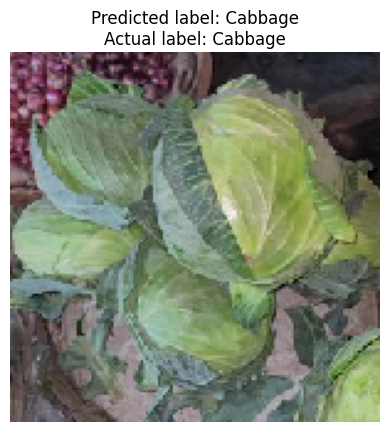

In [124]:
# Prediction of image from Test file
img_path = 'Vegetable Images/test/Cabbage/1011.jpg'
PREDICT_image_with_labels(img_path, cnn)

1/1 [==============================] - 0s 23ms/step


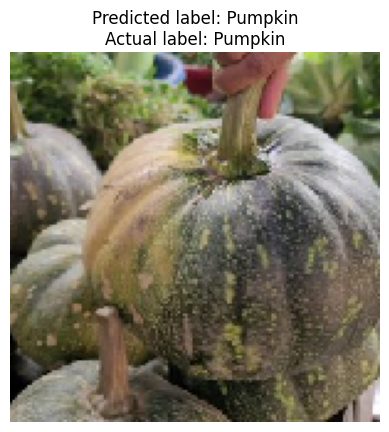

In [125]:
# Prediction of image from Test file
img_path = 'Vegetable Images/test/Pumpkin/1011.jpg'
PREDICT_image_with_labels(img_path, cnn)

1/1 [==============================] - 0s 22ms/step


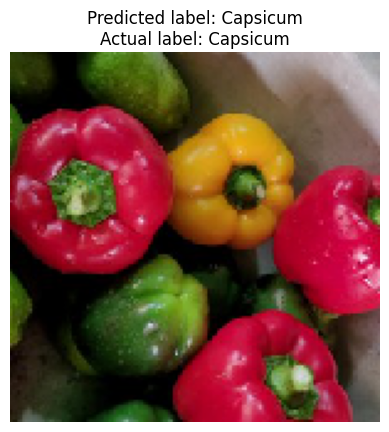

In [130]:
img_path = 'Vegetable Images/test/Capsicum/1001.jpg'
PREDICT_image_with_labels(img_path, cnn)

1/1 [==============================] - 0s 23ms/step


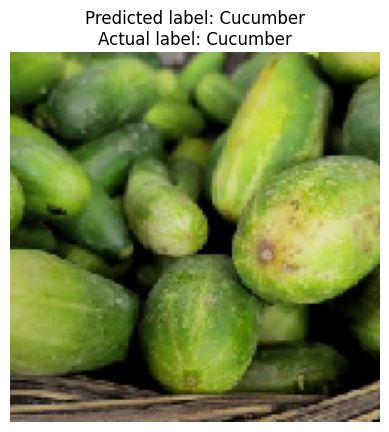

In [133]:
img_path = 'Vegetable Images/test/Cucumber/1125.jpg'
PREDICT_image_with_labels(img_path, cnn)

>## Save the Initial model as Group1_vegetable_cat_classifier2.h5

In [134]:
cnn.save("Group1_vegetable_cat_classifier2.h5")

It's always a good idea to test our model with new data to ensure that it generalizes well to real-world scenarios. Hence we decided to upload a few images of vegetables from google and the predictions results below. 

>## Testing Both Model
<li>Group1_vegetable_cat_classifier2.h5 using categorical_classifier.

Earlier, we had made a mistake of using the Binary Classifier (with val_accuracy of 0.98). WE did save that model and decided to compare it with the corrected model, using the Categorical_Classifier. For fun, we decided to see how the two models predicted images from Google.

In [137]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# testing the predicitons on both our correct model and the incorrect model (with binary_classifier)
model_file_path='Group1_vegetable_bin_classifier.h5'
model_Binary = load_model(model_file_path)

# Corrected model using categorical classifier
model_file_path2='Group1_vegetable_cat_classifier2.h5'
model_Categorical = load_model(model_file_path)

In [138]:
# plotting the predicions on a 2X3 grid using the test pictures from my google drive.
def plot_predictions(model, file_paths):
    num_images = len(file_paths)

    # Define the figure and axis objects
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Iterate over the rows and columns of the grid
    for i in range(2):
        for j in range(3):
            # Calculate the index of the current image
            index = i * 3 + j

            # Load and preprocess the image
            img = image.load_img(file_paths[index], target_size=(150, 150))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x /= 255.

            # Get the predicted and actual labels
            predicted_label = np.argmax(model.predict(x), axis=-1)[0]
            actual_label = os.path.basename(os.path.dirname(file_paths[index]))

            # Display the image with the predicted and actual labels
            axs[i][j].imshow(img)
            axs[i][j].set_title(f"Predicted: {class_names[predicted_label]}\nActual: {actual_label}")
            axs[i][j].axis("off")

    # Show the plot
    plt.show()

Testing on Model that used Binary_Classification

1/1 [==============================] - 0s 21ms/step


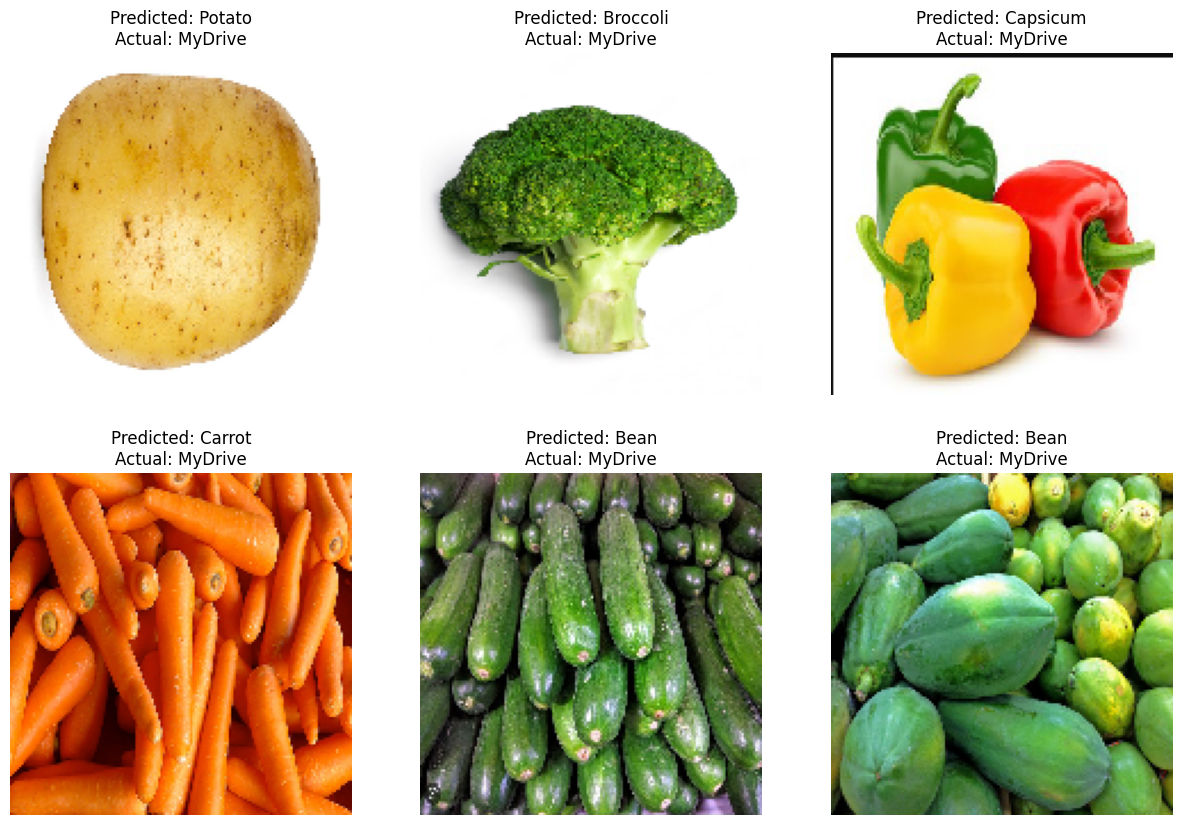

In [139]:
file_paths=['Potato.jpg', 'Image B.png','Capsicum.jpg', 'Carrots.png', 'cucumber.jpg', 'Papaya.png']
plot_predictions(model_Binary, file_paths)

Testing on Model that used Categorical_Classification

1/1 [==============================] - 0s 20ms/step


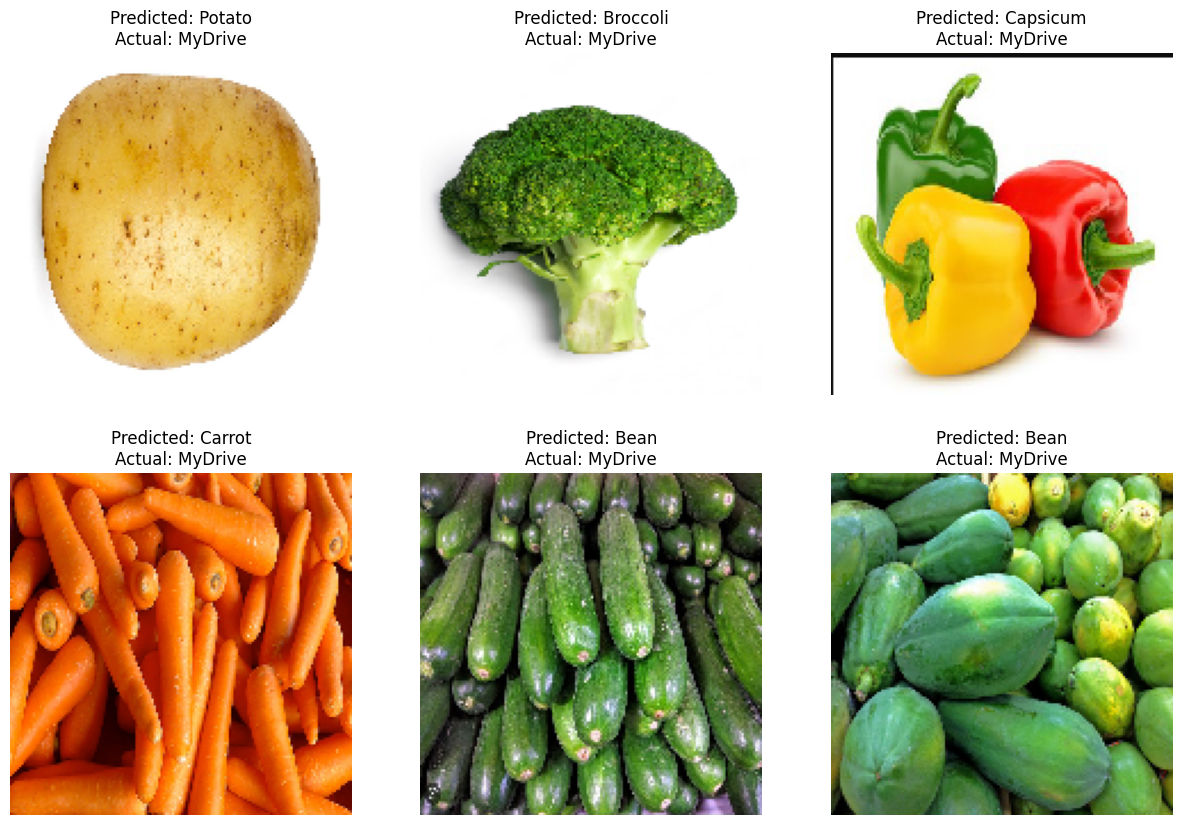

In [140]:
plot_predictions(model_Categorical, file_paths)

<li>Despite the mistake, we were still able to make predictions on both models using images from Google. This shows the flexibility and versatility of Deep Learning models, as they can still make predictions even with different input data and training conditions.

>## Transfer Learning

Transfer learning is a technique in deep learning that involves using a pre-trained model as a starting point for a new task. Instead of starting from scratch and training a new model on a large dataset, we can use an existing pre-trained model that has already learned to recognize certain patterns and features. This can save us time and computational resources, as well as improve the performance of our new model.

Transfer learning is useful when we have a limited amount of training data for our new task, or when we want to improve the performance of our model on a new task by leveraging knowledge learned from a related task. For example, we can use a pre-trained model that was trained on a large dataset of natural images to perform image classification on a new dataset of similar images, even if the new dataset is smaller.

There are many pre-trained models available for use in transfer learning, such as VGG, ResNet, and Inception. These models have been pre-trained on large datasets such as ImageNet, which contains millions of images, and have learned to recognize a wide variety of patterns and features that are useful for many different image-related tasks. By using these pre-trained models as a starting point for our own models, we can benefit from the knowledge learned by these models and improve the performance of our own models on our specific tasks.

In our case we are using the pre-trained model as a starting point and then fine-tuning it to work for our specific task of classifying vegetable images. This is called transfer learning because we are transferring the knowledge learned from training on the large and diverse dataset to our smaller and more specific vegetable classification task.

It would be better to take a smaller sample of the validation set from the original dataset, as the purpose of the validation set is to evaluate the performance of the model on data that it hasn't seen during training. Taking a smaller sample from the validation set ensures that the model hasn't overfit to that particular subset of the data.

Transfer Learnin Azim.

In [141]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_file_path2 = 'Group1_vegetable_cat_classifier2.h5'


Then, we can continue with the steps for transfer learning that we discussed earlier. We will need to freeze the layers of the pre-trained model, add a new classifier layer, compile the model, and train the model using the training set and the validation set.

The training set is used to train the model's weights, while the validation set is used to evaluate the model's performance during training and tune hyperparameters.

When performing transfer learning, you typically use a pre-trained model's learned feature representations and adapt them to your specific task by training a new classifier layer(s) using your own dataset. The pre-trained model's weights are usually kept fixed (i.e., "frozen") during this process to prevent the learned features from being overwritten.

The purpose of using both the training set and the validation set during transfer learning is to ensure that the new classifier layer(s) can generalize well to new, unseen examples. The model is trained on the training set and evaluated on the validation set to prevent overfitting to the training set. The validation set is also used to monitor the model's performance during training and tune the hyperparameters (e.g., learning rate, batch size) of the training process to improve the model's generalization ability.

Therefore, both the training set and the validation set are important for successful transfer learning.

In [142]:
print(val_set.labels.shape)

(3000,)


Using example from Hands-on ML with Scikit-Learn, Keras & Tensorflow, page 347. Load pre-trained model: model_A

In [143]:
model_A=keras.models.load_model(model_file_path2)#our initial model using categorical Classifier

Create a new model with all layers except the last one: Model_B_on_A

In [144]:
model_B_on_A=keras.models.Sequential(model_A.layers[:-1])

Had to add the following layers as during the first iteration of transfer learning, the model was overfitting to the training data and was not able to generalize well to the new data.

In [145]:
model_B_on_A.add(tf.keras.layers.Dense(units=150, activation='relu'))
model_B_on_A.add(tf.keras.layers.Dropout(0.2, name='droppout_4'))

Adding another Dense layer and Dropout layer after 2nd iteration.

In [146]:
model_B_on_A.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_B_on_A.add(tf.keras.layers.Dropout(0.2, name='droppout_5'))

Add a new output layer with 15 units

In [147]:
model_B_on_A.add(keras.layers.Dense(15, activation='softmax'))

model_A and model_B_on_A now share some layers. So when we train model_B_on_A, it will also affect model_A. To avoid this, we need to clone model_A before we reuse its layers. To do this, we clone model A's architecture with clone_model(), then copy its weights (since clone_model() does not clone the weights):

In [148]:
model_A_clone=keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Now we can train model_B_on_A for task B.

By setting layer.trainable = False for all layers except for the output layer in model_B_on_A, we are freezing those layers and preventing their weights from being updated during training. This means that only the weights in the new output layer will be updated during training, while the pre-trained weights in the other layers will remain fixed.

Freezing the pre-trained layers can be useful when we want to reuse the features learned by a pre-trained model for a new task, without changing those features too much. By freezing the layers, we can prevent the model from overfitting to the new data, and reduce the risk of losing the generalization power of the pre-trained weights.

In [149]:


for layer in model_B_on_A.layers[:-1]:
  layer.trainable=False

model_B_on_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model_B_on_A fit at epochs=10, and using validation_data=val_set.

In [150]:
history = model_B_on_A.fit(training_set, epochs=10, validation_data=val_set)# we will start with 10 epochs


Epoch 1/10
469/469 [==============================] - 102s 215ms/step - loss: 2.7395 - accuracy: 0.2123 - val_loss: 1.3612 - val_accuracy: 0.7583
Epoch 2/10
469/469 [==============================] - 100s 214ms/step - loss: 1.5796 - accuracy: 0.5110 - val_loss: 0.8620 - val_accuracy: 0.9077
Epoch 3/10
469/469 [==============================] - 100s 214ms/step - loss: 1.1792 - accuracy: 0.6585 - val_loss: 0.6608 - val_accuracy: 0.9217
Epoch 4/10
469/469 [==============================] - 100s 214ms/step - loss: 0.9975 - accuracy: 0.7178 - val_loss: 0.5405 - val_accuracy: 0.9317
Epoch 5/10
469/469 [==============================] - 101s 214ms/step - loss: 0.8917 - accuracy: 0.7512 - val_loss: 0.4577 - val_accuracy: 0.9410
Epoch 6/10
469/469 [==============================] - 100s 214ms/step - loss: 0.8123 - accuracy: 0.7660 - val_loss: 0.4059 - val_accuracy: 0.9433
Epoch 7/10
469/469 [==============================] - 101s 215ms/step - loss: 0.7530 - accuracy: 0.7834 - val_loss: 0.3671 -

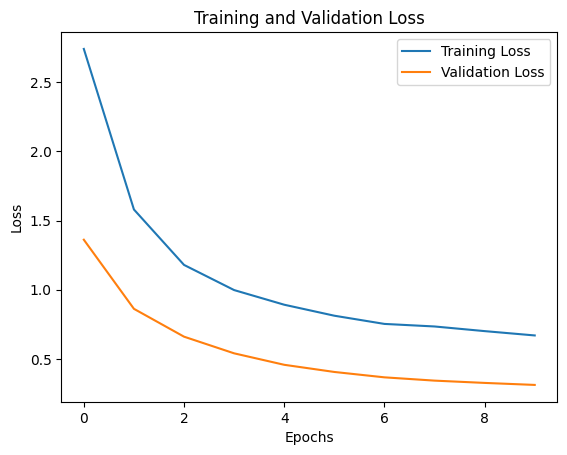

In [151]:
# get the training and validation loss from history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Now, by setting layer.trainable = True for all layers except for the output layer in model_B_on_A, we are unfreezing those layers and allowing their weights to be updated during training. This means that the pre-trained weights in those layers will be fine-tuned to better fit our new classification task.

When we freeze a layer in a model, its weights are not updated during training, and the layer acts as a fixed feature extractor. This is useful when we want to reuse the features learned by a pre-trained model for a new task, without changing those features too much.

In [152]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=True

In [153]:
#optimizer=keras.optimizers.Adam(learning_rate=.00001) #reducing the learning_rate from default of 0.001
model_B_on_A.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_B_on_A.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [154]:
history_B_on_A = model_B_on_A.fit(training_set, epochs=25, validation_data=val_set)

Epoch 1/25
469/469 [==============================] - 103s 215ms/step - loss: 0.3508 - accuracy: 0.8945 - val_loss: 0.1881 - val_accuracy: 0.9510
Epoch 2/25
469/469 [==============================] - 101s 216ms/step - loss: 0.2115 - accuracy: 0.9389 - val_loss: 0.1234 - val_accuracy: 0.9673
Epoch 3/25
469/469 [==============================] - 101s 215ms/step - loss: 0.1694 - accuracy: 0.9524 - val_loss: 0.1440 - val_accuracy: 0.9653
Epoch 4/25
469/469 [==============================] - 101s 215ms/step - loss: 0.1919 - accuracy: 0.9477 - val_loss: 0.1484 - val_accuracy: 0.9633
Epoch 5/25
469/469 [==============================] - 101s 216ms/step - loss: 0.1448 - accuracy: 0.9612 - val_loss: 0.1699 - val_accuracy: 0.9603
Epoch 6/25
469/469 [==============================] - 101s 215ms/step - loss: 0.1854 - accuracy: 0.9481 - val_loss: 0.1452 - val_accuracy: 0.9637
Epoch 7/25
469/469 [==============================] - 101s 215ms/step - loss: 0.1335 - accuracy: 0.9635 - val_loss: 0.1461 -

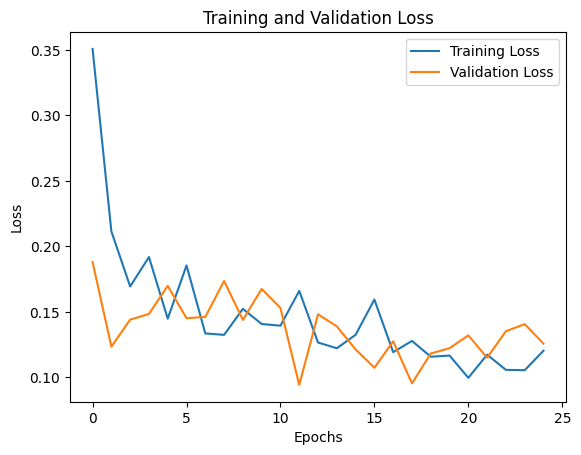

In [155]:
# get the training and validation loss from history object
train_loss = history_B_on_A.history['loss']
val_loss = history_B_on_A.history['val_loss']

# plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

By setting the trainable attribute of all layers in model_B_on_A to True, we can now train the entire model, including the pre-trained layers, on our dataset. By using a smaller learning rate, we can ensure that the pre-trained weights are fine-tuned gradually and do not deviate too much from their original values.

In [156]:
# Evaluating the model usint the test_set
test_loss, test_acc = model_B_on_A.evaluate(test_set)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

94/94 [==============================] - 17s 177ms/step - loss: 0.1375 - accuracy: 0.9647
Test accuracy: 0.9646666646003723
Test loss: 0.13745462894439697


In [157]:
# set the class names
#Set the class_names list to the correct labels of the vegetable classes.
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# update the class indices with the class names
# Updated the class_indices attribute of the test_set or val_set with the class_names list.
test_set.class_indices = dict(zip(test_set.class_indices.values(), class_names))

# get the predictions for the test set
y_pred = np.argmax(model_B_on_A.predict(test_set), axis=-1)

# get the true labels for the test set
y_true = test_set.classes

# generate the classification report
# Passed the target_names parameter to the classification_report() function to assign the correct labels to the report.
print(classification_report(y_true, y_pred, target_names=class_names))

#By doing these changes, we ensured that the classification report and confusion matrix show the correct labels of the vegetable classes, instead of just showing their class indices.

94/94 [==============================] - 17s 180ms/step
              precision    recall  f1-score   support

        Bean       0.99      0.96      0.98       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       0.99      0.99      0.99       200
     Brinjal       0.96      0.98      0.97       200
    Broccoli       0.93      0.99      0.96       200
     Cabbage       0.97      0.96      0.96       200
    Capsicum       0.98      0.99      0.99       200
      Carrot       0.89      1.00      0.94       200
 Cauliflower       0.96      0.96      0.96       200
    Cucumber       0.99      0.97      0.98       200
      Papaya       0.97      0.98      0.98       200
      Potato       0.99      0.92      0.96       200
     Pumpkin       0.98      0.92      0.95       200
      Radish       1.00      0.96      0.98       200
      Tomato       0.98      0.95      0.97       200

    accuracy                           0.97      3000
   macro avg       0.97 

>## Saving the model and its weights after Transfer Training (TT)

In [158]:
# save the entire model
model_B_on_A.save('model_B_on_A.h5')
# save the model weights
model_B_on_A.save_weights('model_B_on_A_weights.h5')

>## Load Weights function to download weights from a URL.

In [159]:

def classify_image(model_path, weights_path, image_url):
    # Load the model and its weights
    TT_model = keras.models.load_model(model_path)
    TT_model.load_weights(weights_path)

    # Define the URL of the image to be classified
    URL = image_url

    # Fetch the image and preprocess it
    response = requests.get(URL)
    img = image.load_img(BytesIO(response.content), target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    # Define the list of class names
    class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

    # Make a prediction using the model
    predicted_class = np.argmax(TT_model.predict(x))

    # Display the image and the predicted class
    plt.imshow(img)
    plt.title(f"Predicted class: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 92ms/step


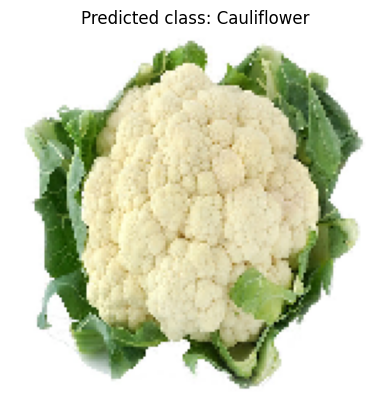

In [ ]:
classify_image('Group1_vegetable_cat_classifier2.h5', 'model_B_on_A_weights.h5', 'https://cdn.shopify.com/s/files/1/0260/1884/0625/products/cauliflower_e220e774-4232-4abc-beb6-16d3ce2b7e1b.jpg?v=1588881320')


># For Akeem to Run

In [160]:
model1_file_path2 = 'Group1_vegetable_cat_classifier2.h5' # original model from scratch
TT_model_file_path='model_B_on_A.h5' #Model from Tranfer Learning
TT_model_weight_file_path='model_B_on_A_weights.h5' # Model weights after Transfer Learning

# # please change to your URL link.
URL='https://cdn.shopify.com/s/files/1/0260/1884/0625/products/cauliflower_e220e774-4232-4abc-beb6-16d3ce2b7e1b.jpg?v=1588881320'

In [ ]:
# Please choose a model (any model file path above, or your own model), model weight (TT_model_file_path)
# Please change URL above to your URL
# If you have your own model, please add it to the file paths above
# the below code is already ready for model1, Tranfer Training weights, and URL example.
classify_image(model1_file_path2, TT_model_weight_file_path, URL)
